In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import numpy as np
import plotly.graph_objects as go
from math import pi

import pandas as pd

from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum

from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, CategoricalColorMapper, Select, HoverTool, Whisker
from bokeh.layouts import row, column
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap, factor_mark, linear_cmap, cumsum, jitter
from bokeh.palettes import Category20c

Используя Bokeh, постройте  круговую диаграмму - количество вакансий внутри города. Выдвиньте клин, соответствующий городу Москва. Добавьте название диаграммы. В качестве источника данных используйте файл по ссылке ниже:

https://disk.yandex.ru/i/yDppoT1Txpy7Fg

In [11]:
df1=pd.read_excel('zachet (1).xlsx')
df11 = df1.groupby('city').count()
data1 = df11.id.to_dict()
output_notebook()

data = pd.Series(data1).reset_index(name='value').rename(columns={'index': 'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(data1)]

p = figure(height=350, title="Количество вакансий по городам", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

Loading BokehJS ...

Используя Dash, создайте дэшборд из двух графиков, в одной строке - Столбиковую диаграмму (минимальная зп по каждому городу), и частотную диаграмму описывающую число вакансий, содержащих слово "Senior"  и не содержащих.  Добавьте название дэшборда. В качестве источника данных используйте файл по ссылке ниже:

https://disk.yandex.ru/i/yDppoT1Txpy7Fg


In [25]:
from jupyter_dash import JupyterDash
from dash import dcc, html
import plotly.express as px 
 
min_salaries = df1.groupby('city')['salary'].min()
fig1 = go.Figure(data=[go.Bar(x=min_salaries.index, y=min_salaries)])
fig1.update_layout(title='Минимальная зарплата по городу', xaxis_title='Город', yaxis_title='Минимальная зарплата')

senior_counts = df1['name'].str.contains('Senior').value_counts()
fig2 = go.Figure(data=[go.Pie(labels=['Non-Senior', 'Senior'], values=senior_counts)])
fig2.update_layout(title='Количество вакансий уровня Senior', showlegend=False)

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1('Анализ вакансий по городам'),
    html.Div([
        dcc.Graph(figure=fig1, className='six columns'),
        dcc.Graph(figure=fig2, className='six columns')
    ], className='row')
])

if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/


Используя Seaborn, постройте круговую диаграмму, отражающую суммарную зп, внутри города. Добавьте название диаграммы, подпись размера долей в процентах. В качестве источника данных используйте файл по ссылке ниже:

https://disk.yandex.ru/i/yDppoT1Txpy7Fg

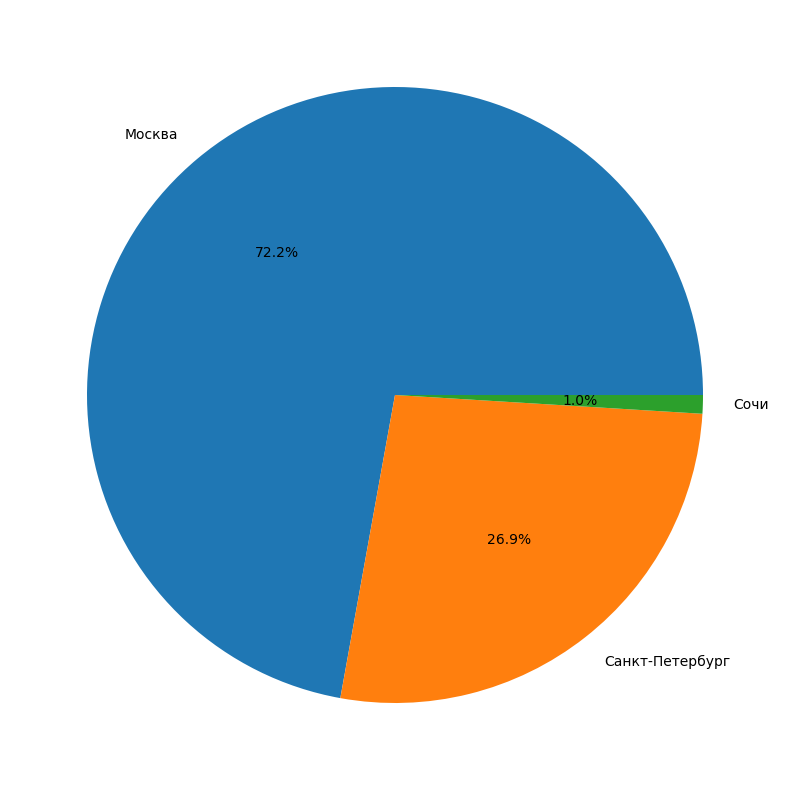

In [16]:
df2 = df1[['city', 'salary']].groupby('city').sum()
df2 = df2.reset_index()
df2 = df2.sort_values(by='salary', ascending=False)

plt.figure(figsize=(10, 10))
plt.pie(df2['salary'], labels=df2['city'], autopct='%1.1f%%');

Используя Matplotlib, постройте ящичковую диаграммму, отражающую распределение зп, внутри города. Добавьте название диаграммы. В качестве источника данных используйте файл по ссылке ниже:

https://disk.yandex.ru/i/yDppoT1Txpy7Fg

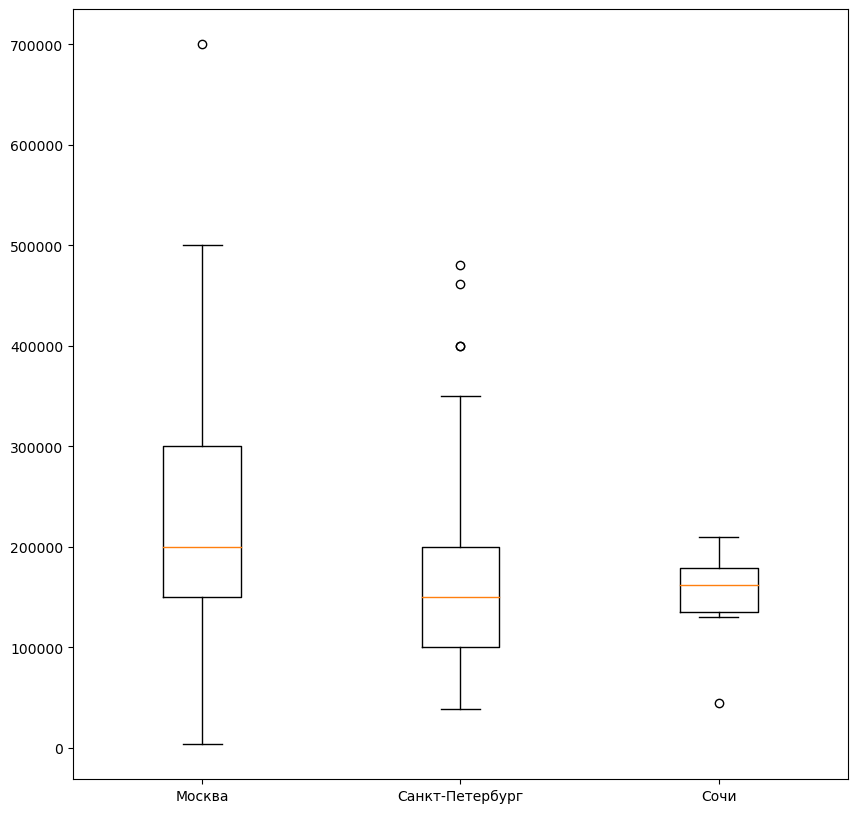

In [22]:
df3 = df1[['city', 'salary']]

plt.figure(figsize=(10, 10))
# plot boxplot with matplotlib.pyplot for every city

plt.boxplot([df3[df3['city'] == 'Москва']['salary'],
                df3[df3['city'] == 'Санкт-Петербург']['salary'],
                df3[df3['city'] == 'Сочи']['salary'],],
                labels=['Москва', 'Санкт-Петербург', 'Сочи']);


Используя Plotly, постройте иерархическую диаграмму (treemap), по сгруппированной таблице - город/новый столбец (содержит название вакансии слово Python или нет)/среднее значение зп. Добавьте название диаграммы. В качестве источника данных используйте файл по ссылке ниже:

https://disk.yandex.ru/i/yDppoT1Txpy7Fg

In [42]:
df1['python'] = df1['name'].apply(lambda x: 'python' if 'Python' in x else 'not python')
df4 = df1[['city', 'python']].groupby(['city', 'python']).size().reset_index(name='counts')
df4 = df4.pivot(index='city', columns='python', values='counts')
fig = go.Figure(data=go.Heatmap(z = df4.values, x = df4.columns, y = df4.index, 
                                colorscale='Viridis', colorbar=dict(title='Average number of flights')))
fig.show()